In [2]:
import os
import sys
import numpy as np
import polars as pl

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(notebook_dir)



project_path = "/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding"
model = "FOXA2-FOXM1-Contrasting"
sample = "chr7"
jaspar_file = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/{model}.jaspar"  # Update this path

df = pl.read_parquet("/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/data/processed_results/FOXA2-FOXM1-Contrasting_chr2_processed.parquet", 
                    # columns=["chr_name", "start", "end", "cell_line", "targets", "predicted", "weights", "probabilities", "attributions"],
                    # low_memory=True,                        # Reduce memory usage
                    parallel="columns",                     # Enable parallel reading
                    use_statistics=True,                    # Use parquet statistics
                    memory_map=True)                         # Use memory mapping
df = df.rename({"chr_name": "chr"})

# just get columns that exist in the parquet first
df.head()


chr,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],list[list[f64]]
"""chr2""",84299920,84300975,"""Hep_G2""",1.0,1.0,1.0,0.99836,"[[0.757356, 0.831034, … 0.75287]]","[[0.0, 0.0, … 0.104942], [0.0, -0.149053, … 0.135186], … [0.0, 0.0, … 0.057022]]"
"""chr2""",213283887,213285071,"""Hep_G2""",1.0,1.0,1.0,0.994503,"[[0.916546, 0.690292, … 0.834285]]","[[0.0, 0.0, … 0.092732], [0.0, 0.081059, … 0.038458], … [0.0, 0.0, … 0.250667]]"
"""chr2""",193428302,193428937,"""Hep_G2""",1.0,1.0,1.0,0.997404,"[[0.912183, 0.310727, … 0.923607]]","[[0.0, 0.0, … 0.027509], [0.139432, 0.0, … 0.023767], … [0.0, 0.0, … -0.03426]]"
"""chr2""",18559697,18561026,"""Hep_G2""",1.0,1.0,1.0,0.996564,"[[0.746818, 0.839637, … 0.757962]]","[[0.0, 0.0, … -0.041237], [0.0, 0.0, … -0.117614], … [0.0, 0.0, … -0.222695]]"
"""chr2""",189674019,189675116,"""Hep_G2""",1.0,1.0,1.0,0.997586,"[[0.749736, 0.794796, … 0.716487]]","[[0.0, 0.0, … 0.040119], [0.159035, 0.0, … 0.044564], … [0.0, 0.0, … -0.058857]]"


In [3]:
df.select(['predicted', 'targets']).group_by(['predicted', 'targets']).count()

/tmp/ipykernel_58396/4196913110.py:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df.select(['predicted', 'targets']).group_by(['predicted', 'targets']).count()


predicted,targets,count
f64,f64,u32
0.0,0.0,126
1.0,0.0,796
1.0,1.0,7415
0.0,1.0,30


In [4]:
# get count of 1s and 0s in targets column and predicted column
# df['targets'].value_counts()
df.select(['predicted', 'targets']).group_by(['predicted', 'targets']).count()



/tmp/ipykernel_58396/4213590499.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df.select(['predicted', 'targets']).group_by(['predicted', 'targets']).count()


predicted,targets,count
f64,f64,u32
0.0,0.0,126
1.0,1.0,7415
1.0,0.0,796
0.0,1.0,30


In [5]:
# find best threshold for probabilities column to maximuze f1 score of targets and predicted
from sklearn.metrics import f1_score

# Convert probabilities to numpy array
probabilities = df['probabilities'].to_numpy()

targets = df['targets'].to_numpy()  

# Define a range of threshold values
thresholds = np.linspace(0, 1, 100)

# Initialize variables to store best threshold and F1 score
best_threshold = 0
best_f1_score = 0

# Iterate through thresholds and calculate F1 score
for threshold in thresholds:
    # Convert probabilities to binary predictions
    predictions = (probabilities >= threshold).astype(int)
    
    # Calculate F1 score
    f1 = f1_score(targets, predictions)
    
    # Update best threshold if current F1 score is higher
    if f1 > best_f1_score:
        best_f1_score = f1

print(f"Best threshold: {best_threshold}, F1 score: {best_f1_score}")



Best threshold: 0, F1 score: 0.9582250649610233


In [6]:
df

chr,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],list[list[f64]]
"""chr2""",84299920,84300975,"""Hep_G2""",1.0,1.0,1.0,0.99836,"[[0.757356, 0.831034, … 0.75287]]","[[0.0, 0.0, … 0.104942], [0.0, -0.149053, … 0.135186], … [0.0, 0.0, … 0.057022]]"
"""chr2""",213283887,213285071,"""Hep_G2""",1.0,1.0,1.0,0.994503,"[[0.916546, 0.690292, … 0.834285]]","[[0.0, 0.0, … 0.092732], [0.0, 0.081059, … 0.038458], … [0.0, 0.0, … 0.250667]]"
"""chr2""",193428302,193428937,"""Hep_G2""",1.0,1.0,1.0,0.997404,"[[0.912183, 0.310727, … 0.923607]]","[[0.0, 0.0, … 0.027509], [0.139432, 0.0, … 0.023767], … [0.0, 0.0, … -0.03426]]"
"""chr2""",18559697,18561026,"""Hep_G2""",1.0,1.0,1.0,0.996564,"[[0.746818, 0.839637, … 0.757962]]","[[0.0, 0.0, … -0.041237], [0.0, 0.0, … -0.117614], … [0.0, 0.0, … -0.222695]]"
"""chr2""",189674019,189675116,"""Hep_G2""",1.0,1.0,1.0,0.997586,"[[0.749736, 0.794796, … 0.716487]]","[[0.0, 0.0, … 0.040119], [0.159035, 0.0, … 0.044564], … [0.0, 0.0, … -0.058857]]"
…,…,…,…,…,…,…,…,…,…
"""chr2""",200797246,200798060,"""Hep_G2""",1.0,1.0,1.0,0.999057,"[[0.891945, 0.915081, … 0.802296]]","[[0.0, 0.0, … 0.007176], [0.0, 0.0, … 0.009856], … [0.0, 0.0, … 0.006103]]"
"""chr2""",226136922,226137941,"""Hep_G2""",1.0,1.0,1.0,0.998981,"[[0.644284, 0.751316, … 0.852985]]","[[0.0, 0.0, … 0.009224], [-0.199327, 0.0, … 0.015714], … [0.0, 0.0, … 0.008504]]"
"""chr2""",109966192,109966690,"""Hep_G2""",1.0,1.0,1.0,0.999178,"[[0.992821, 0.976515, … 0.964319]]","[[0.0, 0.0, … 0.000578], [0.0, -0.120208, … 0.001257], … [0.0, 0.0, … 0.006983]]"


In [7]:
# create df with probabilities more that .99
df_FOXA2 = df.filter(pl.col('probabilities') > 0.99)
df_FOXA2



chr,start,end,cell_line,targets,predicted,weights,probabilities,linear_512_output,attributions
str,i64,i64,str,f64,f64,f64,f64,list[list[f64]],list[list[f64]]
"""chr2""",84299920,84300975,"""Hep_G2""",1.0,1.0,1.0,0.99836,"[[0.757356, 0.831034, … 0.75287]]","[[0.0, 0.0, … 0.104942], [0.0, -0.149053, … 0.135186], … [0.0, 0.0, … 0.057022]]"
"""chr2""",213283887,213285071,"""Hep_G2""",1.0,1.0,1.0,0.994503,"[[0.916546, 0.690292, … 0.834285]]","[[0.0, 0.0, … 0.092732], [0.0, 0.081059, … 0.038458], … [0.0, 0.0, … 0.250667]]"
"""chr2""",193428302,193428937,"""Hep_G2""",1.0,1.0,1.0,0.997404,"[[0.912183, 0.310727, … 0.923607]]","[[0.0, 0.0, … 0.027509], [0.139432, 0.0, … 0.023767], … [0.0, 0.0, … -0.03426]]"
"""chr2""",18559697,18561026,"""Hep_G2""",1.0,1.0,1.0,0.996564,"[[0.746818, 0.839637, … 0.757962]]","[[0.0, 0.0, … -0.041237], [0.0, 0.0, … -0.117614], … [0.0, 0.0, … -0.222695]]"
"""chr2""",189674019,189675116,"""Hep_G2""",1.0,1.0,1.0,0.997586,"[[0.749736, 0.794796, … 0.716487]]","[[0.0, 0.0, … 0.040119], [0.159035, 0.0, … 0.044564], … [0.0, 0.0, … -0.058857]]"
…,…,…,…,…,…,…,…,…,…
"""chr2""",200797246,200798060,"""Hep_G2""",1.0,1.0,1.0,0.999057,"[[0.891945, 0.915081, … 0.802296]]","[[0.0, 0.0, … 0.007176], [0.0, 0.0, … 0.009856], … [0.0, 0.0, … 0.006103]]"
"""chr2""",226136922,226137941,"""Hep_G2""",1.0,1.0,1.0,0.998981,"[[0.644284, 0.751316, … 0.852985]]","[[0.0, 0.0, … 0.009224], [-0.199327, 0.0, … 0.015714], … [0.0, 0.0, … 0.008504]]"
"""chr2""",109966192,109966690,"""Hep_G2""",1.0,1.0,1.0,0.999178,"[[0.992821, 0.976515, … 0.964319]]","[[0.0, 0.0, … 0.000578], [0.0, -0.120208, … 0.001257], … [0.0, 0.0, … 0.006983]]"


In [8]:
def reshape_attributions(df):
    # Convert to numpy array first
    attributions = df['attributions'].values
    
    # Create empty array with correct shape
    n_samples = len(df)  # 46218
    reshaped = np.empty((n_samples, 4096, 5))
    
    # Fill the array by properly accessing each (5,) array
    for i, row in enumerate(attributions):
        for j, element in enumerate(row):
            reshaped[i, j] = element

    # Split into ACGT and ATAC components
    attrs_list = reshaped[..., :4].transpose(0, 2, 1)  # Shape: (n_samples, 4, 4096)
    atac_list = reshaped[..., 4]  # Shape: (n_samples, 4096)
            
    return attrs_list, atac_list

# Usage:
attrs_list, atac_list = reshape_attributions(df.to_pandas())
print(f"Attrs shape: {attrs_list.shape}")
print(f"ATAC shape: {atac_list.shape}")

Attrs shape: (8367, 4, 4096)
ATAC shape: (8367, 4096)


In [9]:
# Import additional required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
from tangermeme.seqlet import recursive_seqlets

# Get seqlets
def get_seqlets(attrs_list):
    attrs_array = np.stack(attrs_list, axis=0)
    seqlets = recursive_seqlets(attrs_array.sum(axis=1))
    
    nt_idx = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    
    # Add sequences to seqlets df
    sequences = []
    for i in range(len(seqlets)):
        sample = seqlets.iloc[i]
        start = int(sample['start'])
        end = int(sample['end'])
        sample_idx = int(sample['example_idx'])
        
        sample_attrs = attrs_array[sample_idx, :, start:end].T.squeeze()
        hits = np.argmax(sample_attrs, axis=1)
        seq = ''.join([nt_idx[i] for i in hits])
        sequences.append(seq)
    seqlets['sequence'] = sequences
    
    return seqlets

# Plot function (simplified version)
def plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=20):
    sample = seqlets.iloc[[sample_rank]]
    slice = int(sample['example_idx'].tolist()[0])
    sequence = sample['sequence'].tolist()[0]
    start = int(sample['start'].tolist()[0])
    end = int(sample['end'].tolist()[0])
    
    seqlen = end - start
    window_size = seqlen + (context_size * 2)
    
    X_attr = attrs_list[slice]
    X_attr = X_attr.astype(np.float64)
    
    TSS_pos = int(np.mean([start, end]))
    window = (TSS_pos - (window_size // 2), TSS_pos + (window_size // 2))
    
    plt.figure(figsize=(16, 9), dpi=300)
    ax = plt.subplot(111)
    plot_logo(
        X_attr,
        ax=ax,
        start=window[0],
        end=window[1]
    )
    
    plt.xlabel("Genomic Coordinate")
    plt.ylabel("Attributions")
    plt.title(f"DeepLIFT Attributions for sample: {slice} | {sequence}")
    plt.show()

Matplotlib is building the font cache; this may take a moment.


In [10]:
seqlets = get_seqlets(attrs_list)
# filtered_seqlets = seqlets[seqlets["sequence"] == "AAAAA"]
# filtered_seqlets
seqlets
# drop any seqlet that is just the same letter repeated
# seqlets = seqlets[~seqlets["sequence"].str.contains(r'^(.)\1+$')]
# most common seqlets of length greather than 10 and drop

,example_idx,start,end,attribution,p-value,sequence
0,7550,4075,4087,12.560049,4.728562e-07,CGCTAAAGCCAT
1,3244,4089,4093,-3.798166,1.382525e-06,TGAA
2,6209,4083,4093,-6.659527,1.790020e-06,CCGAAACAAT
3,3178,196,208,-7.740414,2.080560e-06,CTAGAAATCATA
4,8268,4089,4093,2.707978,2.364324e-06,ATGA
...,...,...,...,...,...,...
46376,1634,6,21,-2.988312,9.868395e-03,CTAACAAATATATGC
46377,6025,4085,4091,-0.963329,9.868395e-03,AACTGA
46378,4106,2531,2548,-3.073988,9.868395e-03,GAACCCAAATAAATGTA
46379,631,1916,1920,-0.455007,9.868395e-03,CACA


In [11]:
# most common seqlets of length greather than 10 and drop
seqlets[seqlets["sequence"].str.len() > 4]["sequence"].value_counts().head(20)
# plot the most common seqlet

sequence
AAAAA     90
AACAA     84
AAACA     72
AAGAA     69
AATAA     59
CAAAA     55
AAAGA     53
AAAAC     52
AAGGA     50
AACCA     48
TACAA     47
AAGCA     44
GAAAA     44
AATCA     43
ACAAA     43
AACGA     42
AATGA     41
AAACAA    41
CACAA     41
ACCAA     41
Name: count, dtype: int64

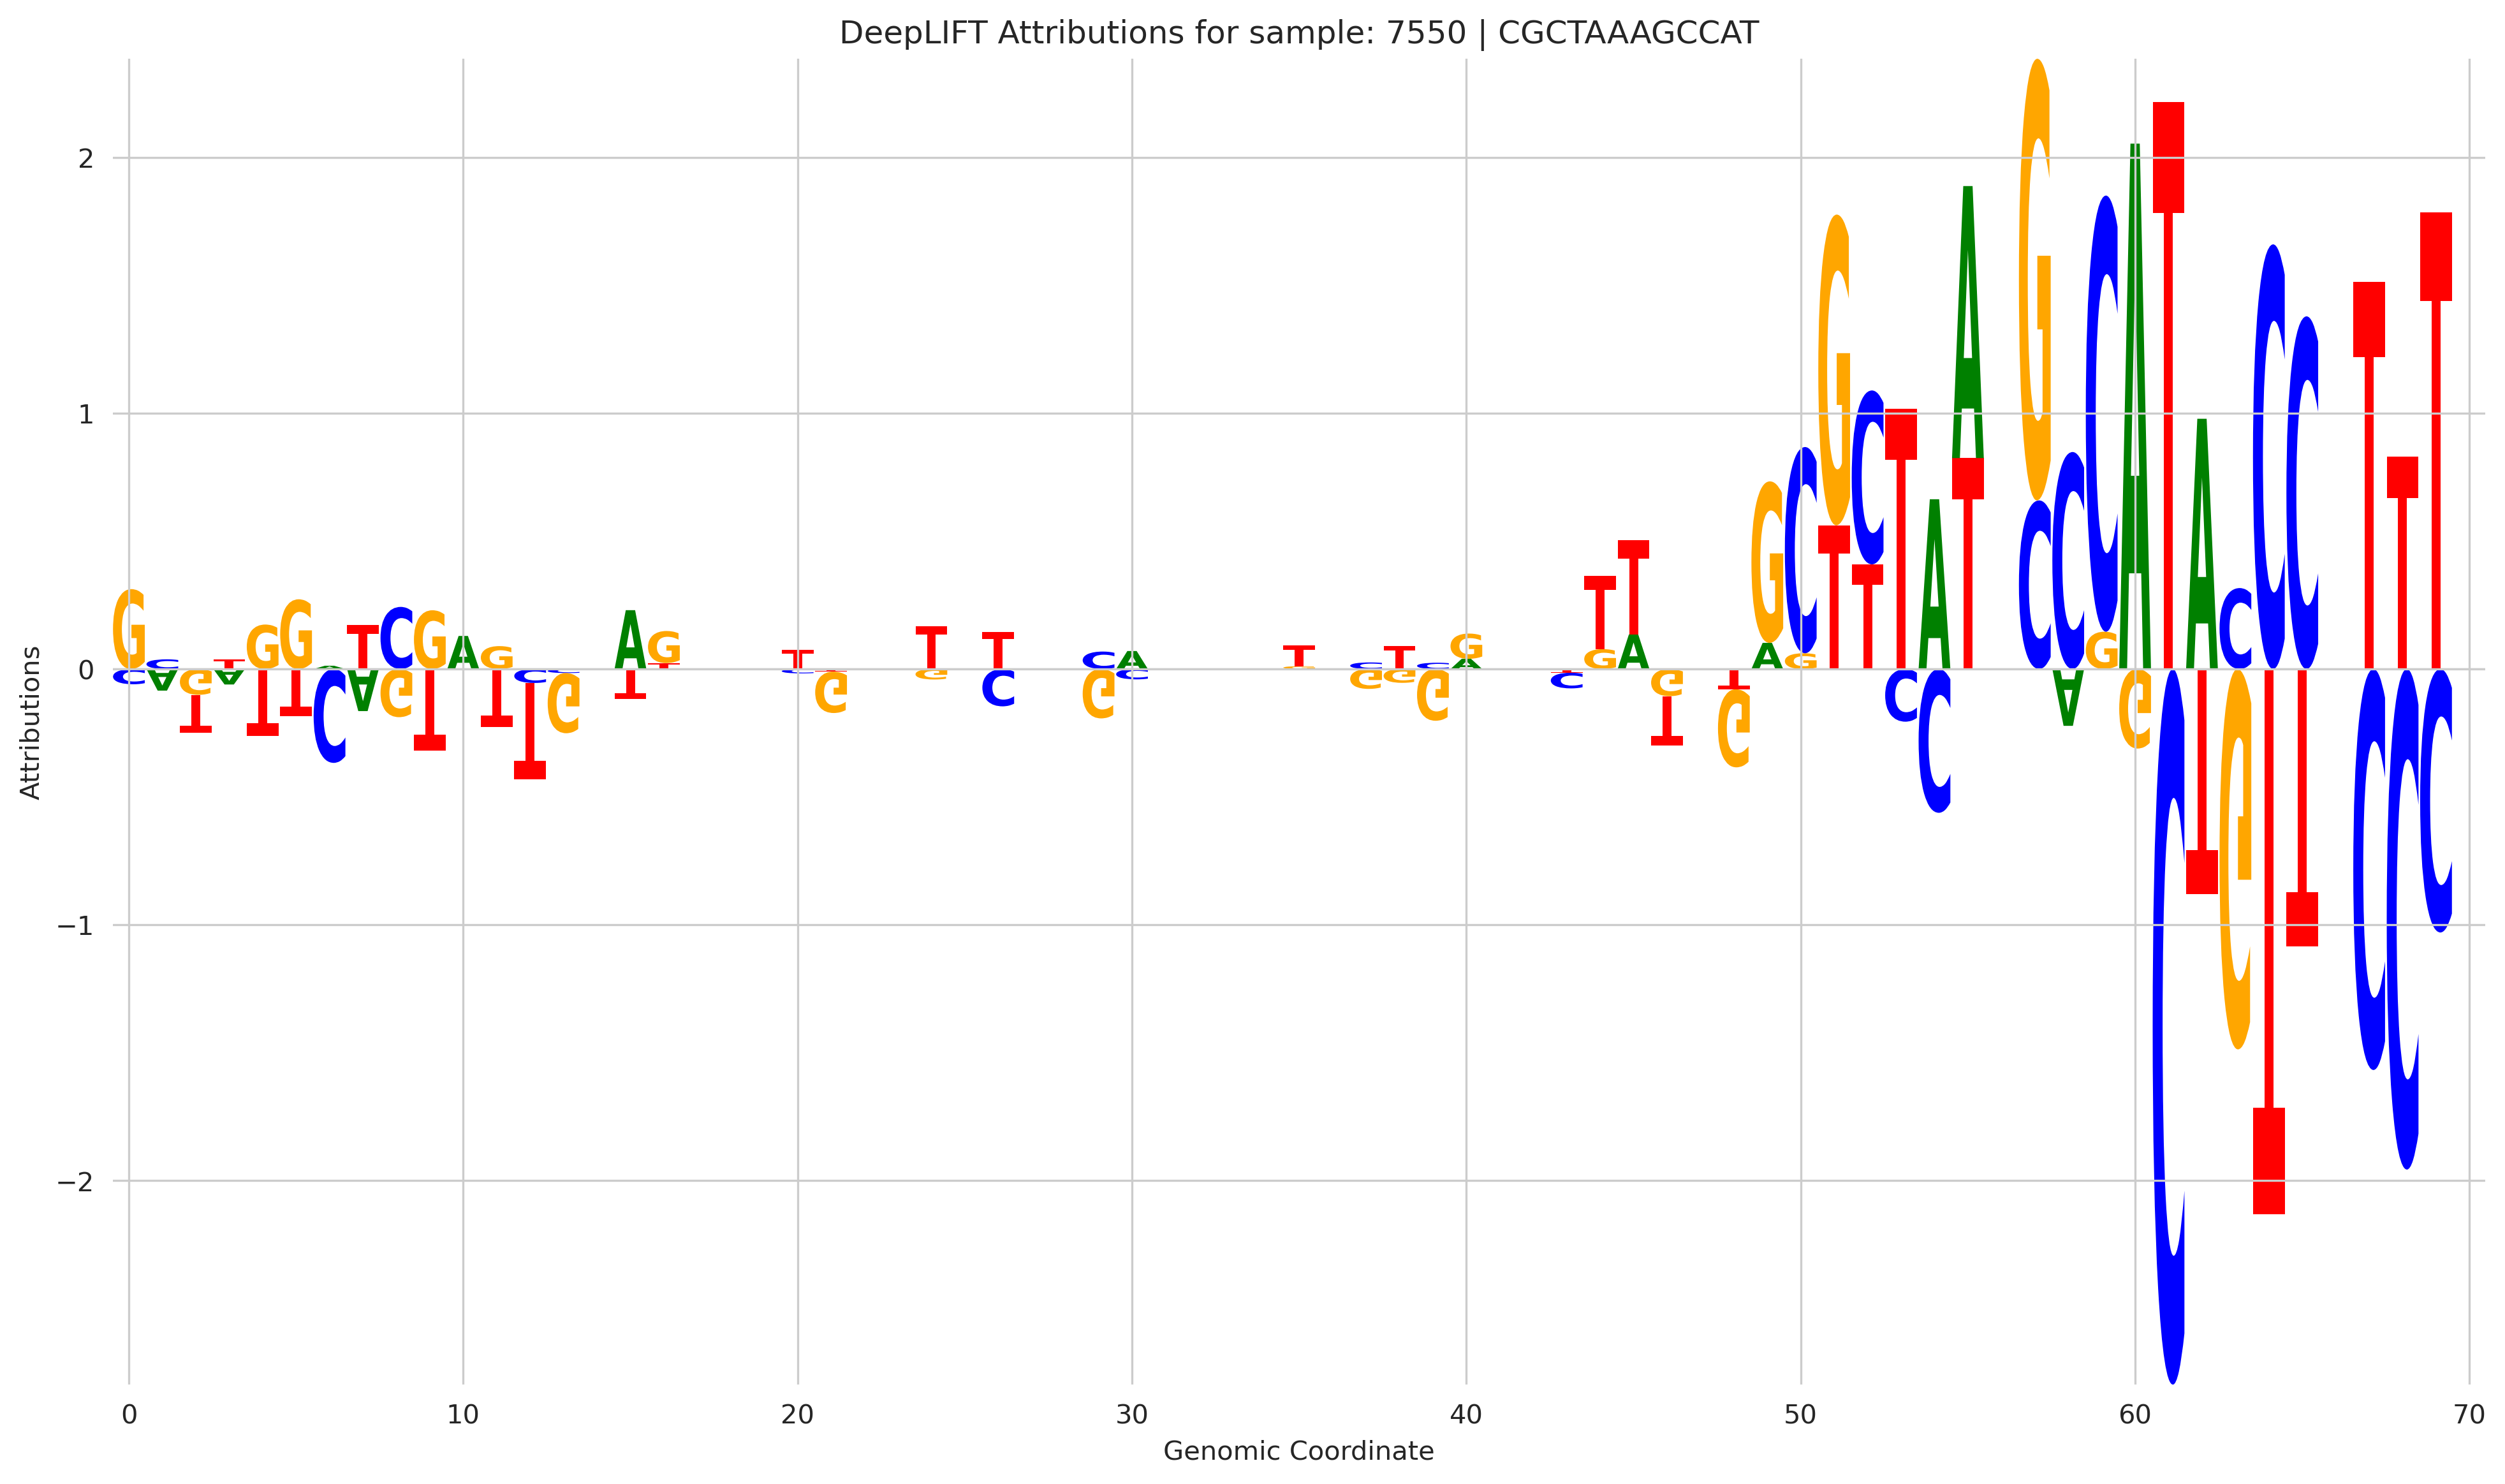

In [12]:
plot_seqlet(seqlets, attrs_list, sample_rank=0, context_size=50)

In [13]:
from dataclasses import dataclass, field
from typing import List, Tuple

@dataclass
class PWM:
    """Container for position weight matrix data."""
    name: str
    matrix: np.ndarray
    bases: List[str] = field(default_factory=lambda: ['A', 'C', 'G', 'T'])
    
    def get_consensus(self, prob_threshold: float = 0.25) -> str:
        """Get consensus sequence from PWM using IUPAC ambiguity codes."""
        iupac_map = {
            'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T',
            'AC': 'M', 'AG': 'R', 'AT': 'W',
            'CG': 'S', 'CT': 'Y', 'GT': 'K',
            'ACG': 'V', 'ACT': 'H', 'AGT': 'D', 'CGT': 'B',
            'ACGT': 'N'
        }
        
        consensus = []
        for pos_probs in self.matrix.T:
            significant_bases = ''.join(b for b, p in zip(self.bases, pos_probs) 
                                     if p >= prob_threshold)
            significant_bases = ''.join(sorted(significant_bases))
            consensus.append(iupac_map.get(significant_bases, 'N'))
        return ''.join(consensus)

def parse_jaspar(jaspar_file: str) -> PWM:
    """Parse a JASPAR format PWM file."""
    with open(jaspar_file) as f:
        lines = f.readlines()
    
    if not lines or len(lines) != 5:
        raise ValueError("Invalid JASPAR format")
        
    name = lines[0].split()[0]
    matrix = []
    
    for line in lines[1:]:
        nums = line.split('[')[1].split(']')[0].strip().split()
        matrix.append([float(x) for x in nums])
    
    matrix = np.array(matrix)
    matrix = matrix / matrix.sum(axis=0)
    
    return PWM(name=name, matrix=matrix)

pwm = parse_jaspar(jaspar_file)
print(f"Loaded PWM: {pwm.name}")
print(f"Consensus sequence: {pwm.get_consensus()}")


FileNotFoundError: [Errno 2] No such file or directory: '/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/FOXA2-FOXM1-Contrasting.jaspar'

In [10]:

def iupac_match(a: str, b: str) -> bool:
    """Check if two IUPAC nucleotide codes match."""
    iupac = {
        'A': {'A'},
        'C': {'C'},
        'G': {'G'},
        'T': {'T'},
        'R': {'A', 'G'},
        'Y': {'C', 'T'},
        'S': {'G', 'C'},
        'W': {'A', 'T'},
        'K': {'G', 'T'},
        'M': {'A', 'C'},
        'B': {'C', 'G', 'T'},
        'D': {'A', 'G', 'T'},
        'H': {'A', 'C', 'T'},
        'V': {'A', 'C', 'G'},
        'N': {'A', 'C', 'G', 'T'}
    }
    
    a = a.upper()
    b = b.upper()
    
    if a not in iupac or b not in iupac:
        raise ValueError(f"Invalid IUPAC code: {a if a not in iupac else b}")
        
    return bool(iupac[a] & iupac[b])


def levenshtein_iupac(seq1: str, seq2: str) -> int:
    """Calculate Levenshtein distance between two DNA sequences with IUPAC codes."""
    if not seq1: return len(seq2)
    if not seq2: return len(seq1)
    
    # Initialize lists instead of range objects
    previous_row = list(range(len(seq2) + 1))
    current_row = [0] * (len(seq2) + 1)
    
    for i, c1 in enumerate(seq1):
        current_row[0] = i + 1
        
        for j, c2 in enumerate(seq2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (not iupac_match(c1, c2))
            
            current_row[j + 1] = min(insertions, deletions, substitutions)
            
        previous_row, current_row = current_row, [0] * (len(seq2) + 1)  # Reset current_row
        
    return previous_row[-1]


def score_seqlet(pwm: PWM, seq: str) -> Tuple[float, int]:
    """Score a sequence against a PWM using IUPAC-aware Levenshtein distance."""
    from Bio import motifs
    from Bio.Seq import Seq
    
    seq_len = len(seq)
    pwm_width = pwm.matrix.shape[1]
    consensus = pwm.get_consensus()
    
    if seq_len < pwm_width:
        max_score = float('-inf')
        best_pos = 0
        for i in range(pwm_width - seq_len + 1):
            cons_slice = consensus[i:i+seq_len]
            raw_dist = levenshtein_iupac(seq, cons_slice)
            norm_score = 1 - (raw_dist / max(len(seq), len(cons_slice)))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos
    
    elif seq_len == pwm_width:
        raw_dist = levenshtein_iupac(seq, consensus)
        norm_score = 1 - (raw_dist / len(consensus))
        return norm_score, 0
    
    else:
        max_score = float('-inf')
        best_pos = 0
        for i in range(seq_len - pwm_width + 1):
            subseq = seq[i:i+pwm_width]
            raw_dist = levenshtein_iupac(subseq, consensus)
            norm_score = 1 - (raw_dist / len(consensus))
            if norm_score > max_score:
                max_score = norm_score
                best_pos = i
        return max_score, best_pos

In [11]:

from tqdm.notebook import tqdm

scores = []
positions = []
for _, row in tqdm(seqlets.iterrows(), total=len(seqlets)):
    score, pos = score_seqlet(pwm, row['sequence'])
    scores.append(score)
    positions.append(pos)

# Add scores to dataframe
seqlets['pwm_score'] = scores
seqlets['pwm_position'] = positions

# Sort by score and display top matches
top_matches = seqlets.sort_values('pwm_score', ascending=False).head(10)
print("\nTop 10 PWM matches:")
print(top_matches[['sequence', 'pwm_score', 'pwm_position']])

  0%|          | 0/112664 [00:00<?, ?it/s]

NameError: name 'pwm' is not defined

In [12]:

def write_fasta(sequences, outfile):
    """Write sequences to FASTA format with auto-generated headers."""
    with open(outfile, 'w') as f:
        for i, seq in enumerate(sequences):
            f.write(f'>seq_{i+1}\n{seq}\n')


def save_seqlets(seqlets, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    pos_seqlets = seqlets[seqlets['attribution'] > 0].reset_index(drop=True)
    neg_seqlets = seqlets[seqlets['attribution'] < 0].reset_index(drop=True)

    pos_seqlets.to_csv(os.path.join(output_dir, "positive_seqlets.csv"), 
                       index=False)
    neg_seqlets.to_csv(os.path.join(output_dir, "negative_seqlets.csv"), 
                       index=False)
    
    candidate_motifs = pos_seqlets['sequence'].tolist()
    write_fasta(
        candidate_motifs, 
        outfile=os.path.join(output_dir, "positive_seqlets.fa")
    )



save_seqlets(seqlets, f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/")



In [13]:
# run python levenstein.py --jaspar motif.jaspar --seqlets positive_seqlets.csv --output lev_pwm.csv
os.system(f"python /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/levenstein.py --jaspar /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/{model}.jaspar --seqlets /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/positive_seqlets.csv --output /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}/lev_pwm.csv")

2025-03-12 13:48:36,180 - INFO - Loading PWM from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/motifs/FOXA1.jaspar
2025-03-12 13:48:36,385 - INFO - Consensus sequence: TGTTTRCWYWG
2025-03-12 13:48:36,385 - INFO - Loading seqlets from /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/positive_seqlets.csv
2025-03-12 13:48:36,574 - INFO - Scoring seqlets
100%|██████████| 62295/62295 [00:33<00:00, 1877.17it/s]
2025-03-12 13:49:09,861 - INFO - Saving 62295 matches to /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/lev_pwm.csv
2025-03-12 13:49:10,675 - INFO - Summary statistics:
2025-03-12 13:49:10,685 - INFO - Mean score: 0.647
2025-03-12 13:49:10,693 - INFO - Max score: 1.000
2025-03-12 13:49:10,693 - INFO - Number of matches above threshold: 62295


0

In [14]:
min_seqlet = 5
receptor_name = model.split("_")[0]
dir = f"/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/{model}_{sample}"
os.system(f"Rscript /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/posthoc.R {min_seqlet} {receptor_name} {dir}")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 62295 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sequence
dbl (10): example_idx, start, end, attribution, p-value, pwm_score, pwm_posi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 62295 Columns: 8
── Column specification ───────────────────────────────────────────────────────

# A tibble: 15,691 × 2
   sequence     n
   <chr>    <int>
 1 AAAAA      867
 2 AAAAAA     843
 3 AAACA      276
 4 TAAAAAA    255
 5 AAAAAAA    226
 6 TAAAAA     213
 7 TAAAA      211
 8 GTAAAAA    206
 9 GTAAA      196
10 AAAAAC     195
# ℹ 15,681 more rows


Warning message:
Removed 33089 rows containing missing values (`geom_point()`). 
Warning message:
Removed 33089 rows containing missing values (`geom_point()`). 
`geom_smooth()` using formula = 'y ~ x'


Rows: 2,293
Columns: 15
$ example_idx          <dbl> 19296, 5606, 7809, 10815, 15329, 15726, 19368, 13…
$ start                <dbl> 2145, 1645, 2027, 2015, 1881, 1799, 1867, 1840, 1…
$ end                  <dbl> 2154, 1656, 2037, 2027, 1899, 1819, 1891, 1864, 1…
$ attribution.x        <dbl> 76.57542, 55.83527, 55.38211, 53.65329, 52.53322,…
$ `p-value.x`          <dbl> 4.422193e-08, 2.843450e-07, 1.425496e-06, 3.04339…
$ sequence             <chr> "TTTTTAATG", "TTTTAACACCA", "GTAAAAACAA", "CATGAA…
$ pwm_score.x          <dbl> 0.6666667, 0.6363636, 0.6000000, 0.3636364, 0.727…
$ pwm_position.x       <dbl> 0, 0, 1, 0, 6, 4, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0…
$ attribution.y        <dbl> 76.57542, 55.83527, 55.38211, 53.65329, 52.53322,…
$ `p-value.y`          <dbl> 4.422193e-08, 2.843450e-07, 1.425496e-06, 3.04339…
$ pwm_score.y          <dbl> 0.6666667, 0.6363636, 0.6000000, 0.3636364, 0.727…
$ pwm_position.y       <dbl> 0, 0, 1, 0, 6, 4, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0…
$ levenshtein_sc

0

In [16]:
import pandas as pd

# load /data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/abundant_candidate_motifs.csv
abundant_candidate_motifs = pd.read_csv("/data1/datasets_1/human_cistrome/chip-atlas/peak_calls/tfbinding_scripts/tf-binding/src/inference/interpretability/output/FOXA1_22Rv1/abundant_candidate_motifs.csv")
abundant_candidate_motifs

,sequence,n
0,AAAAA,867
1,AAAAAA,843
2,AAACA,276
3,TAAAAAA,255
4,AAAAAAA,226
...,...,...
15686,TTTTTTTA,1
15687,TTTTTTTACA,1
15688,TTTTTTTATTTAT,1
15689,TTTTTTTT,1


In [19]:
# drop all sequences with 5 or more As in a row
abundant_candidate_motifs = abundant_candidate_motifs[~abundant_candidate_motifs['sequence'].str.contains('AAAA')]
abundant_candidate_motifs.head(50)



,sequence,n
2,AAACA,276
8,GTAAA,196
13,AAACAA,159
16,TAAACA,153
17,TGTTT,152
18,AAATA,143
19,AACAA,142
20,GTAAACA,141
21,AATAA,137
23,TGTTA,134
